# بِسْــــــــــــــــــمِ اللهِ الرَّحْمَنِ الرَّحِيْمِ

# **Prediksi Kerawanan Banjir di Kabupaten Bandung, Jawa Barat**

In [ ]:
pip install pyCaret

## Load data

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import pandas as pd
df= pd.read_csv("/content/Dataset_Banjir_Lengkap_Final.csv")
df.head(2)

,lokasi,latitude,longitude,curah_hujan,penggunaan lahan,jenis tanah,Kategori Curah Hujan,Labeling
0,"JAWA BARAT, KABUPATEN BANDUNG, SOREANG, PANYIR...",-7.049.881,107.521.854,2272.94,1,5,3,0
1,"JAWA BARAT, KABUPATEN BANDUNG, SOREANG, SUKANA...",-7.065.081,107.518.936,2267.37,5,5,3,1


In [ ]:
df = df.drop(['Kategori Curah Hujan', 'Labeling'], axis=1)
df.head(5)

,lokasi,latitude,longitude,curah_hujan,penggunaan lahan,jenis tanah
0,"JAWA BARAT, KABUPATEN BANDUNG, SOREANG, PANYIR...",-7.049.881,107.521.854,2272.94,1,5
1,"JAWA BARAT, KABUPATEN BANDUNG, SOREANG, SUKANA...",-7.065.081,107.518.936,2267.37,5,5
2,"JAWA BARAT, KABUPATEN BANDUNG, PASIRJAMBU, CUK...",-7.079.423,107.499.905,2269.68,5,5
3,"JAWA BARAT, KABUPATEN BANDUNG, PASIRJAMBU, CIS...",-7.127.131,107.488.809,2216.54,7,3
4,"JAWA BARAT, KABUPATEN BANDUNG, PASIRJAMBU, MAR...",-7.130.081,107.459.001,2383.19,5,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681 entries, 0 to 680
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   lokasi            681 non-null    object 
 1   latitude          681 non-null    object 
 2   longitude         681 non-null    object 
 3   curah_hujan       681 non-null    float64
 4   penggunaan lahan  681 non-null    int64  
 5   jenis tanah       681 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 32.1+ KB


#Preprocessing Data


* Pembersihan Kolom Lokasi: Mengubah lokasi sesuai format yang diinginkan.
* Penanganan Nilai Kosong: Mengisi atau menghapus nilai yang hilang.
* Encoding Data Kategorikal: Mengubah data kategori menjadi numerik jika diperlukan.
* Normalisasi/Penskalaan Data: Menyesuaikan skala data numerik.
* Menghapus Duplikasi: Memastikan tidak ada duplikasi data dalam dataset.

In [ ]:
# Remove duplicate rows from the dataset
df = df.drop_duplicates()

# Check the shape of the dataset after removing duplicates
df.shape
df.isnull().sum()

,0
lokasi,0
latitude,0
longitude,0
curah_hujan,0
penggunaan lahan,0
jenis tanah,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 262 entries, 0 to 678
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   lokasi            262 non-null    object 
 1   latitude          262 non-null    object 
 2   longitude         262 non-null    object 
 3   curah_hujan       262 non-null    float64
 4   penggunaan lahan  262 non-null    int64  
 5   jenis tanah       262 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 14.3+ KB


## Mengubah Nominal to Kategorik

In [ ]:
tanah_mapping = {
    1: 'Regosol',
    2: 'Litosol',
    3: 'Andosol',
    4: 'Grumusol',
    5: 'Latosol',
    6: 'Aluvial',
    7: 'Podsolik',
    8: 'Clay'
}

# Menggunakan map untuk transformasi kolom
df['Jenis Tanah'] = df['jenis tanah'].map(tanah_mapping)

In [ ]:
lahan_mapping = {
    1: 'Perkebunan/Kebun',
    2: 'Hutan',
    3: 'Badan Air',
    4: 'Semak Belukar',
    5: 'Tegalan/Ladang',
    6: 'Sawah',
    7: 'Sawah Tadah Hujan',
    8: 'Gedung/Bangunan',
    9: 'Permukiman'
}

# Menggunakan map untuk transformasi kolom
df['Penggunaan Lahan'] = df['penggunaan lahan'].map(lahan_mapping)

In [ ]:
df

,lokasi,latitude,longitude,curah_hujan,penggunaan lahan,jenis tanah,Jenis Tanah,Penggunaan Lahan
0,"JAWA BARAT, KABUPATEN BANDUNG, SOREANG, PANYIR...",-7.049.881,107.521.854,2272.940,1,5,Latosol,Perkebunan/Kebun
1,"JAWA BARAT, KABUPATEN BANDUNG, SOREANG, SUKANA...",-7.065.081,107.518.936,2267.370,5,5,Latosol,Tegalan/Ladang
2,"JAWA BARAT, KABUPATEN BANDUNG, PASIRJAMBU, CUK...",-7.079.423,107.499.905,2269.680,5,5,Latosol,Tegalan/Ladang
3,"JAWA BARAT, KABUPATEN BANDUNG, PASIRJAMBU, CIS...",-7.127.131,107.488.809,2216.540,7,3,Andosol,Sawah Tadah Hujan
4,"JAWA BARAT, KABUPATEN BANDUNG, PASIRJAMBU, MAR...",-7.130.081,107.459.001,2383.190,5,3,Andosol,Tegalan/Ladang
...,...,...,...,...,...,...,...,...
619,"JAWA BARAT, KABUPATEN BANDUNG, PASEH, TANGSIMEKAR",-7.028.698,107.777.331,2039.690,6,6,Aluvial,Sawah
620,"JAWA BARAT, KABUPATEN BANDUNG, CANGKUANG",-6.979.043,107.782.748,31.229,6,6,Aluvial,Sawah
675,"JAWA BARAT, KABUPATEN BANDUNG, NAGREG, CITAMAN...",-7.009.957,107.875.985,26.390,7,5,Latosol,Sawah Tadah Hujan
676,"JAWA BARAT, KABUPATEN BANDUNG, CICALENGKA, CIC...",-6.981.591,107.832.724,1925.330,6,5,Latosol,Sawah


## Labelling Kerawanan Banjir
menngunakan pembobotan skor dengan teknik overlapping berdasarkan beberapa referensi jurnal

In [ ]:
def skor_curah_hujan(curah_hujan):
  if curah_hujan < 1500:
    return 1
  elif 1500 <= curah_hujan <= 2000:
    return 2
  elif 2001 <= curah_hujan <= 2500:
    return 3
  elif 2501 <= curah_hujan <= 3000:
    return 4
  elif curah_hujan > 3000:
    return 5
  else:
    return None
df['Skor Curah Hujan'] = df['curah_hujan'].apply(skor_curah_hujan)

In [ ]:
def skor_penggunaan_lahan(peng_lahan):
  if peng_lahan=='Perkebunan/Kebun' or peng_lahan=='Hutan':
    return 1
  elif peng_lahan=='Badan Air':
    return 2
  elif peng_lahan=='Semak Belukar' or peng_lahan=='Tegalan/Ladang':
    return 3
  elif peng_lahan=='Sawah' or peng_lahan=='Sawah Tadah Hujan':
    return 4
  elif peng_lahan=='Permukiman' or peng_lahan=='Gedung/Bangunan':
    return 5

df['Skor Peng. Lahan'] = df['Penggunaan Lahan'].apply(skor_penggunaan_lahan)

In [ ]:
def skor_jenis_tanah(jenis_tanah):
  if jenis_tanah=='Podsolik' or jenis_tanah=='Clay':
    return 5
  elif jenis_tanah=='Aluvial':
    return 4
  elif jenis_tanah=='Andosol' or jenis_tanah=='Grumusol' or jenis_tanah=='Latosol' :
    return 2
  elif jenis_tanah=='Regosol' or jenis_tanah=='Litosol':
    return 1
df['Skor Jenis Tanah'] = df['Jenis Tanah'].apply(skor_jenis_tanah)

 teknik overlapping berdasarkan beberapa referensi jurnal

In [ ]:
df['Kerawanan']=0.30*df['Skor Curah Hujan']+0.50*df['Skor Peng. Lahan']+0.20*df['Skor Jenis Tanah']

In [ ]:
minimum = min(df['Kerawanan'])
maksimum = max(df['Kerawanan'])
selisih=(maksimum-minimum)/2

# Menentukan batas interval
batas1 = minimum + selisih
batas2 = maksimum

# Membuat kolom baru untuk kategori interval
def kategori_kerawanan(kerawanan):
    if kerawanan <= batas1:
        return 'Rendah'
    elif batas1 < kerawanan <= batas2:
        return 'Tinggi'

# Menambahkan kolom kategori ke DataFrame
df['Kategori Kerawanan'] = df['Kerawanan'].apply(kategori_kerawanan)

# Tampilkan DataFrame dengan kategori baru
print(df[['Kerawanan', 'Kategori Kerawanan']])

     Kerawanan Kategori Kerawanan
0          1.8             Rendah
1          2.8             Rendah
2          2.8             Rendah
3          3.3             Tinggi
4          2.8             Rendah
..         ...                ...
619        3.7             Tinggi
620        3.1             Tinggi
675        2.7             Rendah
676        3.0             Tinggi
678        3.2             Tinggi

[262 rows x 2 columns]


In [ ]:
df.head()

,lokasi,latitude,longitude,curah_hujan,penggunaan lahan,jenis tanah,Jenis Tanah,Penggunaan Lahan,Skor Curah Hujan,Skor Peng. Lahan,Skor Jenis Tanah,Kerawanan,Kategori Kerawanan
0,"JAWA BARAT, KABUPATEN BANDUNG, SOREANG, PANYIR...",-7.049.881,107.521.854,2272.94,1,5,Latosol,Perkebunan/Kebun,3,1,2,1.8,Rendah
1,"JAWA BARAT, KABUPATEN BANDUNG, SOREANG, SUKANA...",-7.065.081,107.518.936,2267.37,5,5,Latosol,Tegalan/Ladang,3,3,2,2.8,Rendah
2,"JAWA BARAT, KABUPATEN BANDUNG, PASIRJAMBU, CUK...",-7.079.423,107.499.905,2269.68,5,5,Latosol,Tegalan/Ladang,3,3,2,2.8,Rendah
3,"JAWA BARAT, KABUPATEN BANDUNG, PASIRJAMBU, CIS...",-7.127.131,107.488.809,2216.54,7,3,Andosol,Sawah Tadah Hujan,3,4,2,3.3,Tinggi
4,"JAWA BARAT, KABUPATEN BANDUNG, PASIRJAMBU, MAR...",-7.130.081,107.459.001,2383.19,5,3,Andosol,Tegalan/Ladang,3,3,2,2.8,Rendah


In [ ]:
# Save the DataFrame to an Excel file
df1=df[['lokasi', 'curah_hujan', 'Penggunaan Lahan', 'Jenis Tanah','Kategori Kerawanan']]
df1.to_excel('data_banjir.xlsx', index=False)

# Download the Excel file
# from google.colab import files
# files.download('data_banjir.xlsx')



---



#Eksplorasi Data (EDA)

* Distribusi Lokasi: Mengetahui jumlah kejadian banjir di tiap kecamatan atau desa yang tercatat.
* Analisis Curah Hujan: Mengetahui distribusi data curah hujan untuk melihat hubungan potensial antara curah hujan dan kejadian banjir.
* Hubungan Geografis: Menganalisis hubungan lokasi (latitude dan longitude) dengan kejadian banjir.
* Korelasi Fitur: Mencari korelasi antara fitur seperti curah_hujan, penggunaan lahan, dan jenis tanah.
* Kategori Curah Hujan: Menganalisis distribusi kategori curah hujan untuk melihat apakah ada hubungan antara kategori tertentu dan kejadian banjir.

## Uji Korelasi

In [ ]:
# Mapping kategori ordinal ke angka
Kategori_Kerawanan_mapping = {
    'Rendah': 0,
    'Tinggi': 1,
}

# Menggunakan map untuk mengganti kategori dengan angka
df['Kategori Kerawanan Numerik'] = df['Kategori Kerawanan'].map(Kategori_Kerawanan_mapping)

In [ ]:
# Korelasi Spearman
df[['penggunaan lahan', 'jenis tanah', 'curah_hujan','Kategori Kerawanan Numerik']].corr(method='spearman')

,penggunaan lahan,jenis tanah,curah_hujan,Kategori Kerawanan Numerik
penggunaan lahan,1.000000,0.253407,0.200191,0.809746
jenis tanah,0.253407,1.000000,0.139202,0.417102
curah_hujan,0.200191,0.139202,1.000000,0.284951
Kategori Kerawanan Numerik,0.809746,0.417102,0.284951,1.000000


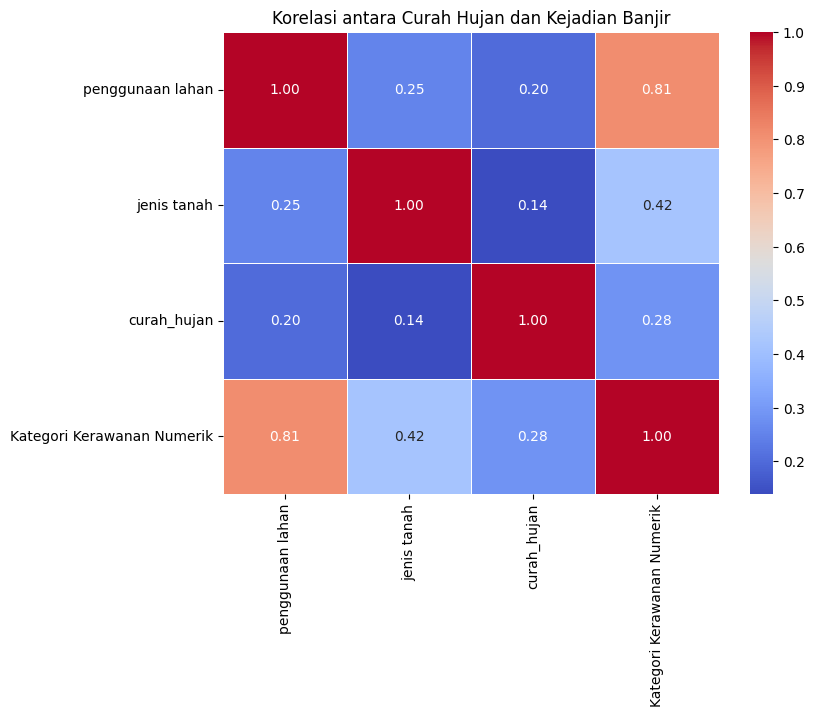

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Menghitung korelasi Pearson untuk variabel numerik
correlation_matrix = df[['penggunaan lahan', 'jenis tanah', 'curah_hujan','Kategori Kerawanan Numerik']].corr(method = 'spearman')

# Visualisasi Korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Korelasi antara Curah Hujan dan Kejadian Banjir')
plt.show()

In [ ]:
# Daftar variabel independen
independent_vars = ['Jenis Tanah', 'Penggunaan Lahan']
dependent_var = 'Kategori Kerawanan'

# Import the necessary function
from scipy.stats import chi2_contingency

# Iterasi untuk setiap variabel independen
for var in independent_vars:
    print(f"\nUji Chi-Square untuk {var} vs {dependent_var}")

    # Tabel kontingensi
    contingency_table = pd.crosstab(df[var], df[dependent_var])
    print("Tabel Kontingensi:")
    print(contingency_table)

    # Uji Chi-Square
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Hasil
    print(f"Chi-Square Stat: {chi2}, P-value: {p}, Degrees of Freedom: {dof}")
    print("Expected Frequencies:")
    print(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns))

    # Interpretasi
    if p < 0.05:
        print("Hasil: Hubungan signifikan antara variabel.")
    else:
        print("Hasil: Tidak ada hubungan signifikan antara variabel.")


Uji Chi-Square untuk Jenis Tanah vs Kategori Kerawanan
Tabel Kontingensi:
Kategori Kerawanan  Rendah  Tinggi
Jenis Tanah                       
Aluvial                 14      75
Andosol                 43       6
Clay                     0       8
Grumusol                 2       2
Latosol                 46      44
Podsolik                 3       4
Regosol                  3      12
Chi-Square Stat: 79.0712406926836, P-value: 5.556561488503368e-15, Degrees of Freedom: 6
Expected Frequencies:
Kategori Kerawanan     Rendah     Tinggi
Jenis Tanah                             
Aluvial             37.706107  51.293893
Andosol             20.759542  28.240458
Clay                 3.389313   4.610687
Grumusol             1.694656   2.305344
Latosol             38.129771  51.870229
Podsolik             2.965649   4.034351
Regosol              6.354962   8.645038
Hasil: Hubungan signifikan antara variabel.

Uji Chi-Square untuk Penggunaan Lahan vs Kategori Kerawanan
Tabel Kontingensi:
Katego

In [ ]:
df.columns

Index(['lokasi', 'latitude', 'longitude', 'curah_hujan', 'penggunaan lahan',
       'jenis tanah', 'Jenis Tanah', 'Penggunaan Lahan', 'Skor Curah Hujan',
       'Skor Peng. Lahan', 'Skor Jenis Tanah', 'Kerawanan',
       'Kategori Kerawanan', 'Kategori Kerawanan Numerik'],
      dtype='object')

## Visualisasi


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import pandas as pd
#Data historis banjir
df2=pd.read_excel('/content/data_banjir.xlsx')
df2.head()

,lokasi,curah_hujan,Penggunaan Lahan,Jenis Tanah,Kategori Kerawanan
0,"JAWA BARAT, KABUPATEN BANDUNG, SOREANG, PANYIR...",2272.94,Perkebunan/Kebun,Latosol,Rendah
1,"JAWA BARAT, KABUPATEN BANDUNG, SOREANG, SUKANA...",2267.37,Tegalan/Ladang,Latosol,Rendah
2,"JAWA BARAT, KABUPATEN BANDUNG, PASIRJAMBU, CUK...",2269.68,Tegalan/Ladang,Latosol,Rendah
3,"JAWA BARAT, KABUPATEN BANDUNG, PASIRJAMBU, CIS...",2216.54,Sawah Tadah Hujan,Andosol,Tinggi
4,"JAWA BARAT, KABUPATEN BANDUNG, PASIRJAMBU, MAR...",2383.19,Tegalan/Ladang,Andosol,Rendah


<ipython-input-23-1cb07fd1cba6>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_locations.index, y=top_10_locations.values, palette="Blues_d")


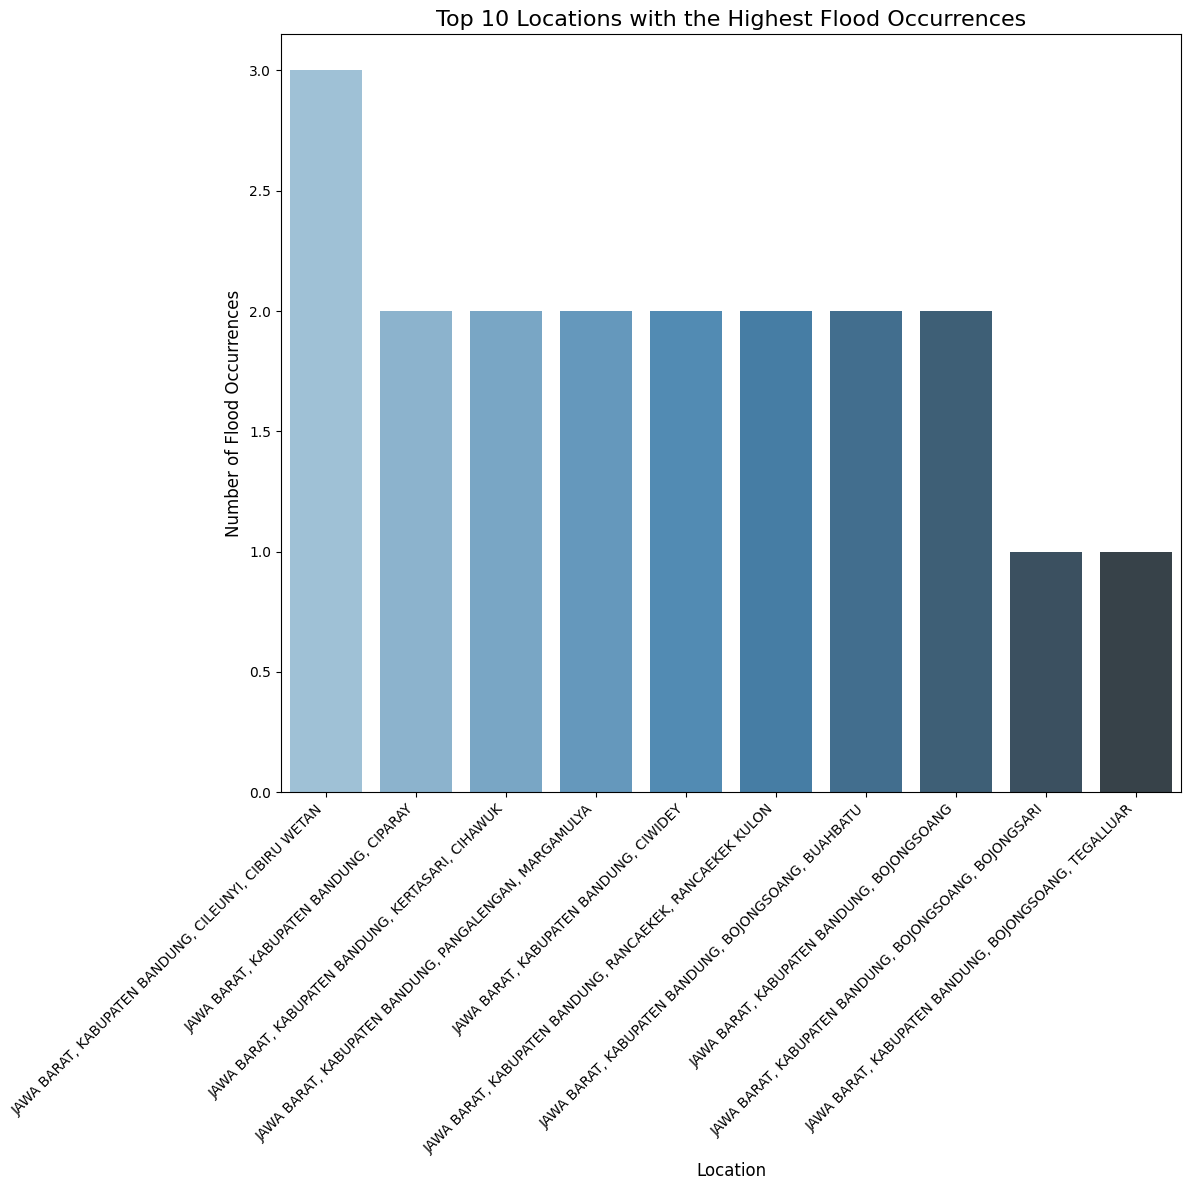

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
top_10_locations = df2['lokasi'].value_counts().head(10)

# Create the bar plot
plt.figure(figsize=(12, 12))
sns.barplot(x=top_10_locations.index, y=top_10_locations.values, palette="Blues_d")
plt.title('Top 10 Locations with the Highest Flood Occurrences', fontsize=16)
plt.xlabel('Location', fontsize=12)
plt.ylabel('Number of Flood Occurrences', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

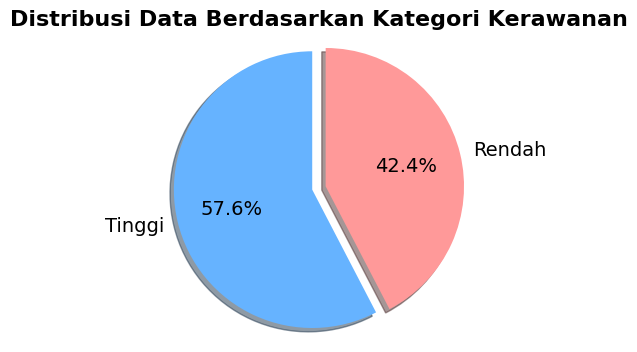

In [ ]:
import matplotlib.pyplot as plt

# Count occurrences of each category
category_counts = df['Kategori Kerawanan'].value_counts()

# Define color palette
colors = ['#66b3ff','#ff9999']

# Explode the largest slice
explode = (0.1, 0)

# Create the pie chart with enhancements
plt.figure(figsize=(4, 4))
plt.pie(category_counts,
        labels=category_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        explode=explode,
        shadow=True, # Add shadow for depth
        textprops={'fontsize': 14}) # Increase font size of labels
plt.title('Distribusi Data Berdasarkan Kategori Kerawanan', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.show()

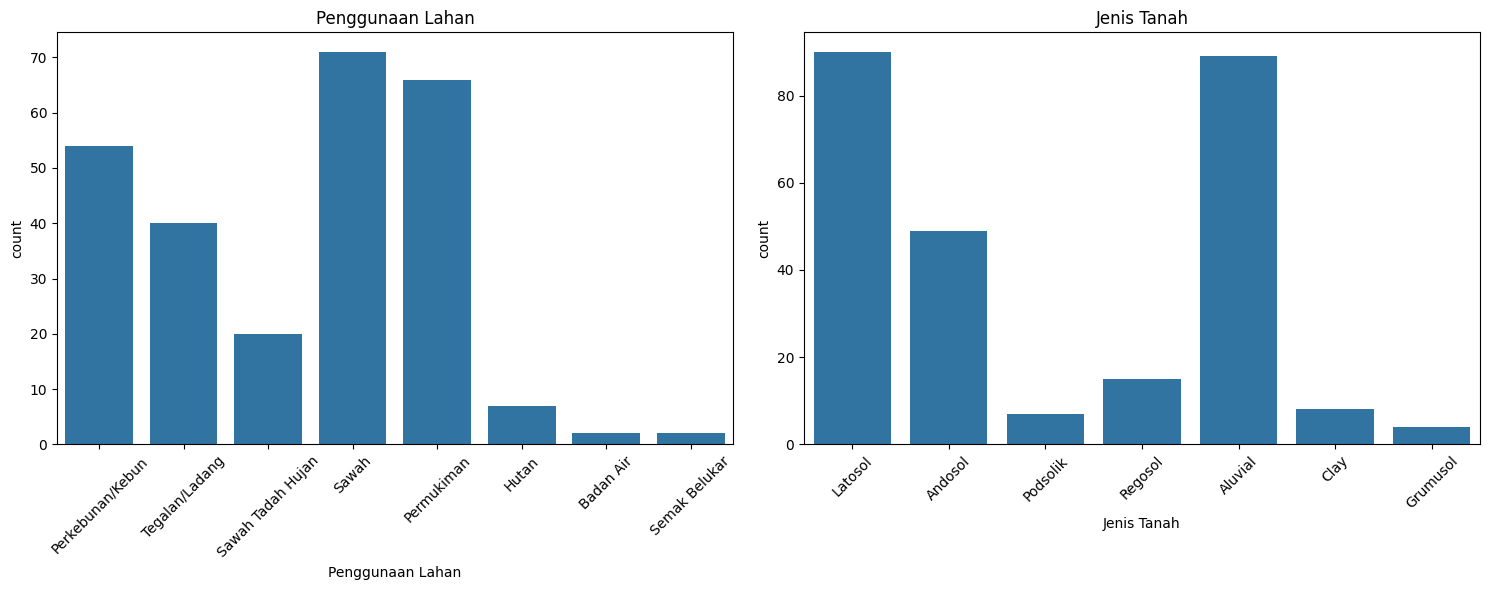

In [ ]:
# prompt: barplot penggunaan lahan, dan jenis tanah

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame with 'Penggunaan Lahan' and 'Jenis Tanah' columns
plt.figure(figsize=(15, 6))

# Bar plot for Penggunaan Lahan
plt.subplot(1, 2, 1)
sns.countplot(x='Penggunaan Lahan', data=df)
plt.title('Penggunaan Lahan')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Bar plot for Jenis Tanah
plt.subplot(1, 2, 2)
sns.countplot(x='Jenis Tanah', data=df)
plt.title('Jenis Tanah')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

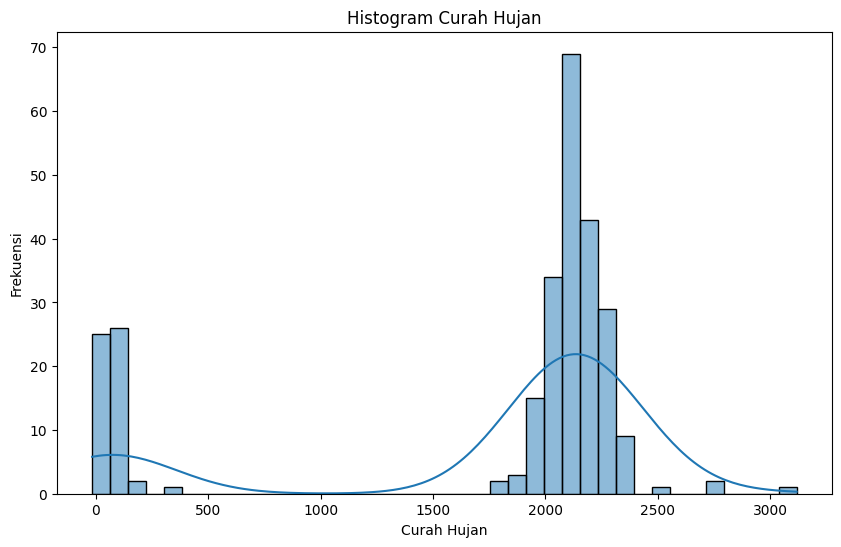

In [ ]:
# prompt: histogram curah_hujan

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and it has a column named 'curah_hujan'
plt.figure(figsize=(10, 6))
sns.histplot(df['curah_hujan'], kde=True)  # Use seaborn's histplot for better aesthetics
plt.title('Histogram Curah Hujan')
plt.xlabel('Curah Hujan')
plt.ylabel('Frekuensi')
plt.show()

## Cek Outlier

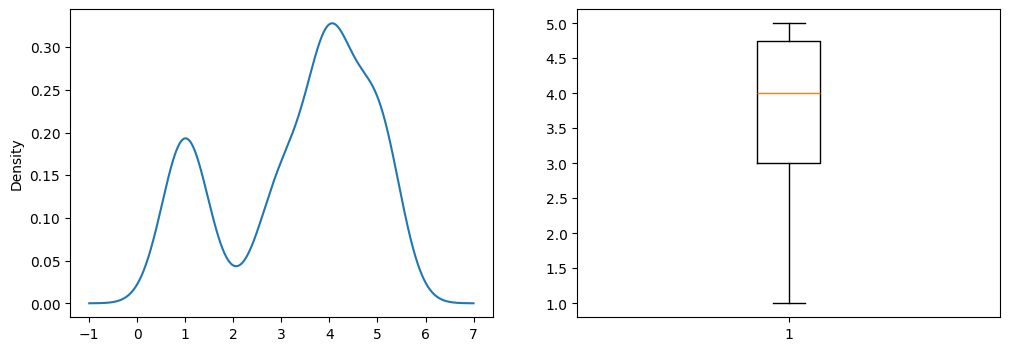

In [ ]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
df['Skor Peng. Lahan'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(df['Skor Peng. Lahan'])
plt.show()

In [ ]:
import numpy as np

# Ambil data skor penggunaan lahan
data = df['Skor Peng. Lahan']

# Hitung Q1, Q3, dan IQR
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1

# Hitung batas outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

# Cari outlier
outliers = data[(data < lower_bound) | (data > upper_bound)]
print("Outlier:", outliers.values)


Q1: 3.0, Q3: 4.75, IQR: 1.75
Lower Bound: 0.375, Upper Bound: 7.375
Outlier: []


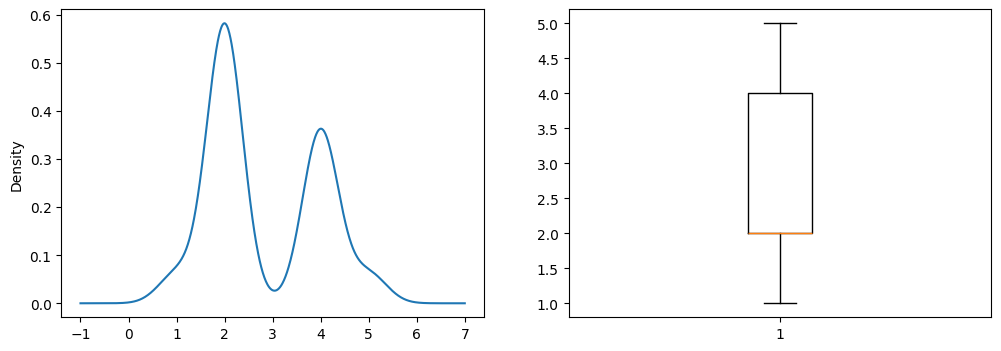

In [ ]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
df['Skor Jenis Tanah'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(df['Skor Jenis Tanah'])
plt.show()

In [ ]:
import numpy as np

# Ambil data skor jenis tanah
data = df['Skor Jenis Tanah']

# Hitung Q1, Q3, dan IQR
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1

# Hitung batas outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

# Cari outlier
outliers = data[(data < lower_bound) | (data > upper_bound)]
print("Outlier:", outliers.values)


Q1: 2.0, Q3: 4.0, IQR: 2.0
Lower Bound: -1.0, Upper Bound: 7.0
Outlier: []


  ## Pivot Tabel


In [ ]:
# Pivot table for 'Kategori Kerawanan' by 'Penggunaan Lahan' and 'Jenis Tanah'
pd.pivot_table(df, values='Kategori Kerawanan', index='Penggunaan Lahan', columns='Jenis Tanah', aggfunc='count')

Jenis Tanah,Aluvial,Andosol,Clay,Grumusol,Latosol,Podsolik,Regosol
Penggunaan Lahan,,,,,,,
Badan Air,2.0,NaN,NaN,NaN,NaN,NaN,NaN
Hutan,NaN,6.0,NaN,NaN,NaN,1.0,NaN
Perkebunan/Kebun,12.0,21.0,NaN,1.0,14.0,3.0,3.0
Permukiman,33.0,1.0,3.0,1.0,18.0,1.0,9.0
Sawah,41.0,2.0,5.0,1.0,19.0,1.0,2.0
Sawah Tadah Hujan,NaN,4.0,NaN,NaN,15.0,NaN,1.0
Semak Belukar,NaN,NaN,NaN,NaN,2.0,NaN,NaN
Tegalan/Ladang,1.0,15.0,NaN,1.0,22.0,1.0,NaN


In [ ]:
df.groupby(['Kategori Kerawanan','Penggunaan Lahan','Jenis Tanah'])['curah_hujan'].mean()

Kategori Kerawanan  Penggunaan Lahan   Jenis Tanah
Rendah              Badan Air          Aluvial        2226.045000
                    Hutan              Andosol        2023.333333
                                       Podsolik       2122.590000
                    Perkebunan/Kebun   Aluvial        1293.714583
                                       Andosol        1540.744619
                                       Grumusol       2063.620000
                                       Latosol        1396.699857
                                       Podsolik       1329.218500
                                       Regosol        2529.650000
                    Sawah              Andosol          86.381000
                                       Latosol          66.964000
                    Sawah Tadah Hujan  Latosol          41.224800
                    Semak Belukar      Latosol        2213.860000
                    Tegalan/Ladang     Andosol        1432.589867
                                       Grumusol       2071.970000
                                       Latosol        1661.566136
Tinggi              Perkebunan/Kebun   Podsolik       3118.860000
                    Permukiman         Aluvial        1934.444121
                                       Andosol          18.111000
                                       Clay           1546.691667
                                       Grumusol       2064.780000
                                       Latosol        1520.261778
                                       Podsolik       2320.310000
                                       Regosol        2108.874444
                    Sawah              Aluvial        1916.459415
                                       Andosol        2149.170000
                                       Clay           1406.273800
                                       Grumusol       2064.160000
                                       Latosol        2097.093125
                                       Podsolik        147.741000
                                       Regosol        2285.065000
                    Sawah Tadah Hujan  Andosol        2123.450000
                                       Latosol        2112.539000
                                       Regosol        2301.960000
                    Tegalan/Ladang     Aluvial        2115.930000
                                       Podsolik       2336.460000
Name: curah_hujan, dtype: float64

# Select Algorithm

In [ ]:
# pip install pyCaret

In [ ]:
#Split the dataset into training and test sets
from sklearn.model_selection import train_test_split
data=df[['curah_hujan', 'Penggunaan Lahan', 'Jenis Tanah', 'Kategori Kerawanan']]
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

In [ ]:
# initialize setup
from pycaret.classification import *
# Setting up the PyCaret environment with the training data and generating a profile report
clf1 = setup(data = train_data, target = 'Kategori Kerawanan')

,Description,Value
0,Session id,2494
1,Target,Kategori Kerawanan
2,Target type,Binary
3,Target mapping,"Rendah: 0, Tinggi: 1"
4,Original data shape,"(183, 4)"
5,Transformed data shape,"(183, 14)"
6,Transformed train set shape,"(128, 14)"
7,Transformed test set shape,"(55, 14)"
8,Numeric features,1
9,Categorical features,2


In [ ]:
#Comparing all models
models = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.9763,1.0000,0.9763,0.9811,0.9758,0.9516,0.9565,0.2280
et,Extra Trees Classifier,0.9679,0.9971,0.9679,0.9728,0.9680,0.9357,0.9401,0.1760
rf,Random Forest Classifier,0.9596,0.9943,0.9596,0.9644,0.9591,0.9173,0.9222,0.2310
lr,Logistic Regression,0.9519,0.9971,0.9519,0.9567,0.9520,0.9024,0.9067,0.8950
dt,Decision Tree Classifier,0.9449,0.9494,0.9449,0.9566,0.9446,0.8894,0.8999,0.0660
gbc,Gradient Boosting Classifier,0.9449,0.9914,0.9449,0.9568,0.9432,0.8872,0.8990,0.2810
ridge,Ridge Classifier,0.9372,0.9971,0.9372,0.9486,0.9358,0.8707,0.8828,0.0670
lda,Linear Discriminant Analysis,0.9295,1.0000,0.9295,0.9419,0.9281,0.8550,0.8682,0.0680
xgboost,Extreme Gradient Boosting,0.9288,0.9743,0.9288,0.9404,0.9270,0.8531,0.8648,0.1000
nb,Naive Bayes,0.9064,0.9588,0.9064,0.9219,0.9051,0.8096,0.8248,0.0670


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
#best_model = automl(optimize = 'Accuracy')
best_model = create_model('rf')

#Fine-tuning the best model
tuned_best_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.8462,1.0000,0.8462,0.8803,0.8404,0.6829,0.7201
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9167,1.0000,0.9167,0.9306,0.9172,0.8333,0.8452


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8462,0.9750,0.8462,0.8462,0.8462,0.6750,0.6750
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.8462,1.0000,0.8462,0.8803,0.8404,0.6829,0.7201
4,0.9231,0.9524,0.9231,0.9341,0.9231,0.8471,0.8571
5,0.9231,1.0000,0.9231,0.9341,0.9231,0.8471,0.8571
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9231,1.0000,0.9231,0.9341,0.9231,0.8471,0.8571
8,0.9167,1.0000,0.9167,0.9306,0.9172,0.8333,0.8452


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
tuned_best_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=2494, verbose=0,
                       warm_start=False)

In [ ]:
predictions = predict_model(tuned_best_model, data = test_data)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9620,0.9950,0.9620,0.9621,0.9619,0.9208,0.9211


In [ ]:
predictions

,curah_hujan,Penggunaan Lahan,Jenis Tanah,Kategori Kerawanan,prediction_label,prediction_score
610,1966.510010,Sawah,Aluvial,Tinggi,Tinggi,1.00
574,2232.580078,Badan Air,Aluvial,Rendah,Tinggi,0.80
458,2262.389893,Permukiman,Clay,Tinggi,Tinggi,0.98
432,2219.510010,Badan Air,Aluvial,Rendah,Tinggi,0.82
134,2097.409912,Permukiman,Latosol,Tinggi,Tinggi,1.00
...,...,...,...,...,...,...
160,2091.979980,Sawah,Latosol,Tinggi,Tinggi,1.00
351,140.009995,Perkebunan/Kebun,Latosol,Rendah,Rendah,0.99
416,86.899002,Tegalan/Ladang,Latosol,Rendah,Rendah,0.97
152,2079.820068,Permukiman,Aluvial,Tinggi,Tinggi,0.99


# Modelling dengan Scikit Learn

In [ ]:
lahan_mapping = {
    'Badan Air': 1,
    'Gedung/Bangunan' : 2,
    'Hutan' : 3,
    'Pekebunan/Kebun' : 4,
    'Permukiman' : 5,
    'Sawah' : 6,
    'Sawah Tadah Hujan' : 7,
    'Semak Belukar' : 8,
    'Tegalan/Ladang' : 9
}

tanah_mapping = {
    'Regosol' : 1,
    'Litosol' : 2,
    'Andosol' : 3,
    'Grumusol' : 4,
    'Latosol' : 5,
    'Aluvial' : 6,
    'Podsolik' : 7,
    'Clay' : 8
}

In [ ]:
df

,lokasi,latitude,longitude,curah_hujan,penggunaan lahan,jenis tanah,Jenis Tanah,Penggunaan Lahan,Skor Curah Hujan,Skor Peng. Lahan,Skor Jenis Tanah,Kerawanan,Kategori Kerawanan,Kategori Kerawanan Numerik
0,"JAWA BARAT, KABUPATEN BANDUNG, SOREANG, PANYIR...",-7.049.881,107.521.854,2272.940,1,5,Latosol,Perkebunan/Kebun,3,1,2,1.8,Rendah,0
1,"JAWA BARAT, KABUPATEN BANDUNG, SOREANG, SUKANA...",-7.065.081,107.518.936,2267.370,5,5,Latosol,Tegalan/Ladang,3,3,2,2.8,Rendah,0
2,"JAWA BARAT, KABUPATEN BANDUNG, PASIRJAMBU, CUK...",-7.079.423,107.499.905,2269.680,5,5,Latosol,Tegalan/Ladang,3,3,2,2.8,Rendah,0
3,"JAWA BARAT, KABUPATEN BANDUNG, PASIRJAMBU, CIS...",-7.127.131,107.488.809,2216.540,7,3,Andosol,Sawah Tadah Hujan,3,4,2,3.3,Tinggi,1
4,"JAWA BARAT, KABUPATEN BANDUNG, PASIRJAMBU, MAR...",-7.130.081,107.459.001,2383.190,5,3,Andosol,Tegalan/Ladang,3,3,2,2.8,Rendah,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,"JAWA BARAT, KABUPATEN BANDUNG, PASEH, TANGSIMEKAR",-7.028.698,107.777.331,2039.690,6,6,Aluvial,Sawah,3,4,4,3.7,Tinggi,1
620,"JAWA BARAT, KABUPATEN BANDUNG, CANGKUANG",-6.979.043,107.782.748,31.229,6,6,Aluvial,Sawah,1,4,4,3.1,Tinggi,1
675,"JAWA BARAT, KABUPATEN BANDUNG, NAGREG, CITAMAN...",-7.009.957,107.875.985,26.390,7,5,Latosol,Sawah Tadah Hujan,1,4,2,2.7,Rendah,0
676,"JAWA BARAT, KABUPATEN BANDUNG, CICALENGKA, CIC...",-6.981.591,107.832.724,1925.330,6,5,Latosol,Sawah,2,4,2,3.0,Tinggi,1


In [ ]:
#Split the dataset into training and test sets
from sklearn.model_selection import train_test_split
data=df[['curah_hujan', 'Penggunaan Lahan', 'Jenis Tanah', 'Kategori Kerawanan']]
def transform(data):
  # Menggunakan map untuk transformasi kolom
  data['Jenis Tanah']= data['Jenis Tanah'].map(tanah_mapping)
  data['Penggunaan Lahan']= data['Penggunaan Lahan'].map(lahan_mapping)
  return data
data=transform(data)
X=data.drop('Kategori Kerawanan', axis=1)
y=data['Kategori Kerawanan']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=5389, verbose=0,
                       warm_start=False)
# Fit the model
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=5389, verbose=0,
                       warm_start=False)

## Model Evaluation

In [ ]:
from sklearn.metrics import classification_report,accuracy_score
y_pred=model.predict(X_test)
print("Accuracy Score ", accuracy_score(y_test, y_pred))


print("Classification Report Sentiment:")
print(classification_report(y_test, y_pred))

Accuracy Score  0.9620253164556962
Classification Report Sentiment:
              precision    recall  f1-score   support

      Rendah       0.97      0.94      0.95        32
      Tinggi       0.96      0.98      0.97        47

    accuracy                           0.96        79
   macro avg       0.96      0.96      0.96        79
weighted avg       0.96      0.96      0.96        79



In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import (
    accuracy_score, roc_auc_score, recall_score, precision_score, f1_score,
    cohen_kappa_score, matthews_corrcoef, classification_report
)

# Assuming y_test and model.classes_ are defined correctly
y_bin = label_binarize(y_test, classes=model.classes_)
y_pred_proba = model.predict_proba(X_test)

# Get predicted labels (highest probability) for roc_auc_score
y_pred_labels = model.predict(X_test)
y_pred_bin = label_binarize(y_pred_labels, classes=model.classes_)


# Menghitung metrik
accuracy = accuracy_score(y_test, y_pred)

# Using y_pred_bin (binarized predicted labels) instead of y_pred_proba
auc = roc_auc_score(y_bin, y_pred_bin, multi_class='ovr')

recall = recall_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
kappa = cohen_kappa_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

# Menampilkan hasil
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC: {auc:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Kappa: {kappa:.4f}")
print(f"MCC: {mcc:.4f}")

Accuracy: 0.9620
AUC: 0.9581
Recall: 0.9581
Precision: 0.9630
F1-Score: 0.9604
Kappa: 0.9208
MCC: 0.9211


Text(45.722222222222214, 0.5, 'True Label')

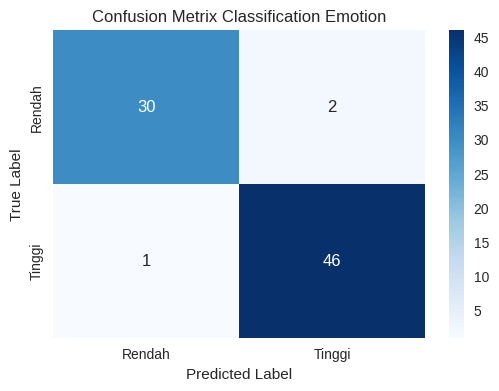

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Metrix Classification Emotion')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

In [ ]:
# Melakukan prediksi pada keseluruhan data uji (X_test)
y_pred = model.predict(X_test)

# Menampilkan hasil prediksi biner
print("Hasil Prediksi Biner:")
print(y_pred)

# Menampilkan probabilitas prediksi
y_pred_proba = model.predict_proba(X_test)
print("\nProbabilitas Prediksi:")
y_pred_proba

prediksi_df = pd.DataFrame({
    'Prediksi (Keterangan)': y_pred.flatten(),  # or y_pred if it's already 1D
    'Label Asli': y_test.values
})

# Add probability columns
prediksi_df['Probabilitas Rendah'] = y_pred_proba[:, 0] # Probability for class 0 (Rendah)
prediksi_df['Probabilitas Tinggi'] = y_pred_proba[:, 1]  # Probability for class 1 (Tinggi)


prediksi_df


Hasil Prediksi Biner:
['Tinggi' 'Tinggi' 'Tinggi' 'Tinggi' 'Tinggi' 'Rendah' 'Tinggi' 'Tinggi'
 'Rendah' 'Tinggi' 'Tinggi' 'Tinggi' 'Rendah' 'Rendah' 'Tinggi' 'Tinggi'
 'Rendah' 'Tinggi' 'Rendah' 'Rendah' 'Tinggi' 'Rendah' 'Tinggi' 'Tinggi'
 'Rendah' 'Rendah' 'Rendah' 'Rendah' 'Tinggi' 'Rendah' 'Tinggi' 'Tinggi'
 'Rendah' 'Tinggi' 'Rendah' 'Tinggi' 'Tinggi' 'Tinggi' 'Tinggi' 'Rendah'
 'Rendah' 'Rendah' 'Tinggi' 'Rendah' 'Rendah' 'Rendah' 'Tinggi' 'Tinggi'
 'Tinggi' 'Tinggi' 'Rendah' 'Tinggi' 'Rendah' 'Tinggi' 'Tinggi' 'Tinggi'
 'Rendah' 'Tinggi' 'Tinggi' 'Rendah' 'Tinggi' 'Tinggi' 'Tinggi' 'Rendah'
 'Tinggi' 'Tinggi' 'Tinggi' 'Tinggi' 'Tinggi' 'Rendah' 'Rendah' 'Tinggi'
 'Tinggi' 'Tinggi' 'Tinggi' 'Rendah' 'Rendah' 'Tinggi' 'Rendah']

Probabilitas Prediksi:


,Prediksi (Keterangan),Label Asli,Probabilitas Rendah,Probabilitas Tinggi
0,Tinggi,Tinggi,0.01,0.99
1,Tinggi,Rendah,0.39,0.61
2,Tinggi,Tinggi,0.01,0.99
3,Tinggi,Rendah,0.40,0.60
4,Tinggi,Tinggi,0.00,1.00
...,...,...,...,...
74,Tinggi,Tinggi,0.00,1.00
75,Rendah,Rendah,0.96,0.04
76,Rendah,Rendah,0.96,0.04
77,Tinggi,Tinggi,0.01,0.99


## Save Model

In [ ]:
import joblib

# Simpan model ke file
joblib.dump(model, 'rf_model_fiks.pkl')
print("Model berhasil disimpan sebagai 'rf_model_fiks.pkl'")


Model berhasil disimpan sebagai 'rf_model_fiks.pkl'


## Menggunakan Model yang telah disimpan

In [ ]:
# Load model
model = joblib.load('rf_model_fiks.pkl')
print("Model berhasil dimuat")

Model berhasil dimuat


###memasukan data

In [ ]:
import pandas as pd
import joblib

# Path file data baru dan model tersimpan
data_baru = pd.read_excel ('/content/Data baru untuk Prediksi.xlsx')
model_path = '/content/rf_model_fiks.pkl'

In [ ]:
# Remove duplicate rows from the dataset
data_baru = data_baru.drop_duplicates()
#missing values
data_baru = data_baru.dropna()
# Check the shape of the dataset after removing duplicates
data_baru.shape
data_baru.isnull().sum()

,0
curah_hujan,0
Penggunaan Lahan,0
Jenis Tanah,0


In [ ]:
data_baru

,latitude,longitude,curah hujan,penggunaan lahan,jenis tanah
0,-7.193613,107.480235,2122.59,2.0,7.0
1,-7.200886,107.393663,2892.42,1.0,3.0
2,-7.144969,107.372247,3113.85,1.0,7.0
3,-7.152107,107.343694,3100.48,1.0,7.0
4,-7.167574,107.324658,3025.60,1.0,7.0
...,...,...,...,...,...
1210,-6.842104,107.680401,2138.27,1.0,3.0
1211,-6.825723,107.742416,NaN,2.0,NaN
1212,-6.832021,107.729653,2125.14,1.0,3.0
1213,-6.837018,107.729296,2125.50,1.0,3.0


In [ ]:
model_path

'/content/rf_model_fiks.pkl'

In [ ]:
data_baru = data_baru.rename(columns={"curah hujan": "curah_hujan", "penggunaan lahan" : "Penggunaan Lahan", "jenis tanah" : "Jenis Tanah"})
data_baru.head(5)

,latitude,longitude,curah_hujan,Penggunaan Lahan,Jenis Tanah
0,-7.193613,107.480235,2122.59,2.0,7.0
1,-7.200886,107.393663,2892.42,1.0,3.0
2,-7.144969,107.372247,3113.85,1.0,7.0
3,-7.152107,107.343694,3100.48,1.0,7.0
4,-7.167574,107.324658,3025.60,1.0,7.0


In [ ]:
data_baru = data_baru.drop(['latitude', 'longitude'], axis=1)
data_baru.head(5)

,curah_hujan,Penggunaan Lahan,Jenis Tanah
0,2122.59,2.0,7.0
1,2892.42,1.0,3.0
2,3113.85,1.0,7.0
3,3100.48,1.0,7.0
4,3025.60,1.0,7.0


## Prediksi Data baru

In [ ]:
# Melakukan prediksi pada keseluruhan data
y_pred = model.predict(data_baru)

# Menampilkan hasil prediksi biner
print("Hasil Prediksi Biner:")
print(y_pred)

# Menampilkan probabilitas prediksi
y_pred_proba = model.predict_proba(data_baru)
print("\nProbabilitas Prediksi:")
y_pred_proba

prediksi_df = pd.DataFrame({
    'Prediksi (Keterangan)': y_pred.flatten(),
})

# Add probability columns
prediksi_df['Probabilitas Rendah'] = y_pred_proba[:, 0] # Probability for class 0 (Rendah)
prediksi_df['Probabilitas Tinggi'] = y_pred_proba[:, 1]  # Probability for class 1 (Tinggi)


prediksi_df

Hasil Prediksi Biner:
['Rendah' 'Rendah' 'Rendah' ... 'Rendah' 'Rendah' 'Rendah']

Probabilitas Prediksi:


,Prediksi (Keterangan),Probabilitas Rendah,Probabilitas Tinggi
0,Rendah,0.65,0.35
1,Rendah,0.61,0.39
2,Rendah,0.52,0.48
3,Rendah,0.52,0.48
4,Rendah,0.52,0.48
...,...,...,...
1016,Tinggi,0.42,0.58
1017,Rendah,0.60,0.40
1018,Rendah,0.56,0.44
1019,Rendah,0.60,0.40


In [ ]:
# Gabungkan hasil prediksi dengan data_baru
data_baru['Prediksi Kerawanan'] = prediksi_df['Prediksi (Keterangan)']
data_baru['Probabilitas Rendah'] = prediksi_df['Probabilitas Rendah']
data_baru['Probabilitas Tinggi'] = prediksi_df['Probabilitas Tinggi']

print(data_baru.head())

   curah_hujan  Penggunaan Lahan  Jenis Tanah Prediksi Kerawanan  \
0      2122.59               2.0          7.0             Rendah   
1      2892.42               1.0          3.0             Rendah   
2      3113.85               1.0          7.0             Rendah   
3      3100.48               1.0          7.0             Rendah   
4      3025.60               1.0          7.0             Rendah   

   Probabilitas Rendah  Probabilitas Tinggi  
0                 0.65                 0.35  
1                 0.61                 0.39  
2                 0.52                 0.48  
3                 0.52                 0.48  
4                 0.52                 0.48  


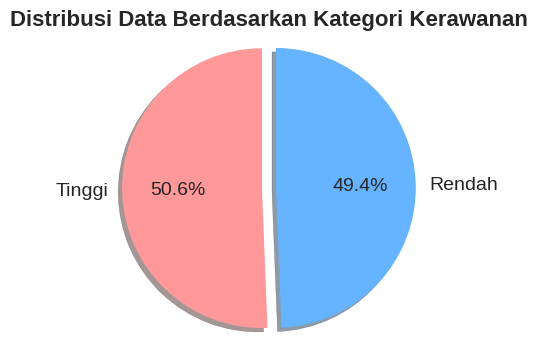

In [ ]:
import matplotlib.pyplot as plt

# Count occurrences of each category
category_counts = data_baru['Prediksi Kerawanan'].value_counts()

# Define color palette
colors = ['#ff9999','#66b3ff']

# Explode the largest slice
explode = (0.1, 0)

# Create the pie chart with enhancements
plt.figure(figsize=(4, 4))
plt.pie(category_counts,
        labels=category_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        explode=explode,
        shadow=True, # Add shadow for depth
        textprops={'fontsize': 14}) # Increase font size of labels
plt.title('Distribusi Data Berdasarkan Kategori Kerawanan', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.show()

In [ ]:
#download data data_baru_cleaned

from google.colab import files
data_baru.to_csv('data_baru_prediksi_model.csv', encoding = 'utf-8-sig')
files.download('data_baru_prediksi_model.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>